# Telecom X – Parte 2: Predicción de Cancelación (Churn)

#### Paula Bustos

### Preparación de los Datos

In [ ]:
import pandas as pd

##### Extracción del Archivo Tratado

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [36]:
df_data = pd.read_csv('TelecomX_Clean_Data.csv')

In [ ]:
df_data

##### Eliminación de Columnas Irrelevantes

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [ ]:
df_data = df_data.drop(columns=['customerID'])
df_data = df_data.drop(columns=['Gender'])
df_data = df_data.drop(columns=['Cuentas_Diarias'])
df_data.head()

##### Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [ ]:
df_procesado = pd.get_dummies(df_data, dtype=int)
df_procesado.head()

##### Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [ ]:
target_col = 'Left_company'
X = df_procesado.drop(columns=[target_col])
y = df_procesado[target_col] 
X.head()

In [41]:
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)

Left_company
0    5163
1    1869
Name: count, dtype: int64
Left_company
0    73.421502
1    26.578498
Name: proportion, dtype: float64


#### Normalización o Estandarización

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [ ]:
!pip install scikit-learn

In [ ]:
!pip uninstall -y numpy scipy scikit-learn
!pip install "numpy<2" scipy scikit-learn

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Correlación y Selección de Variables

##### Análisis de Correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
correlaciones = df_procesado.corr()

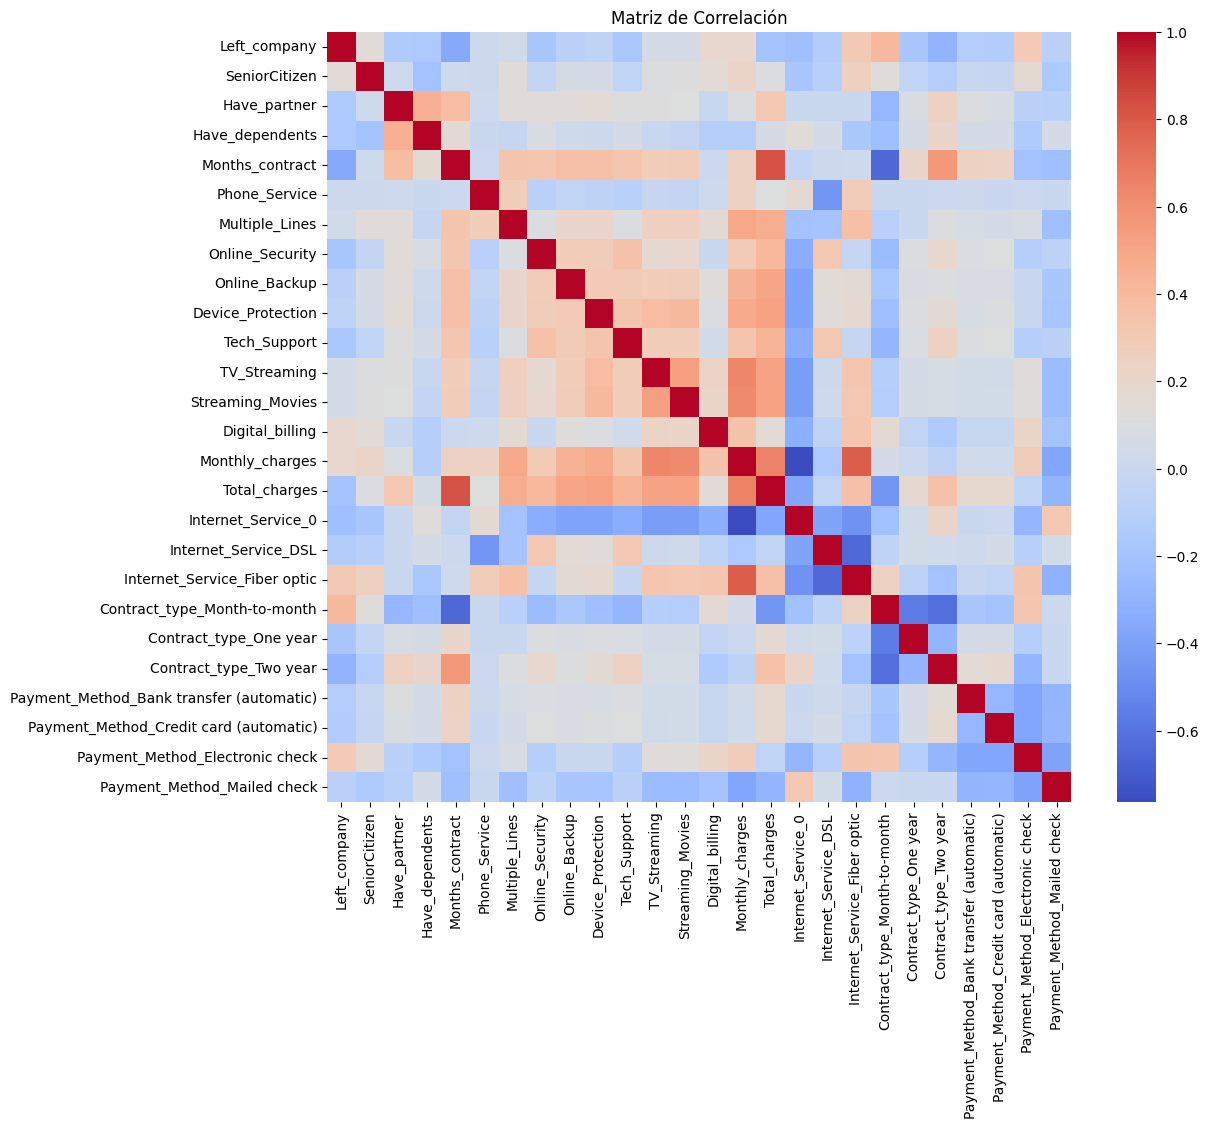

In [48]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlaciones, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación')
plt.show()

In [49]:
print("Correlación con la cancelación (ordenada):")
print(correlaciones['Left_company'].sort_values(ascending=False))

Correlación con la cancelación (ordenada):
Left_company                                1.000000
Contract_type_Month-to-month                0.404565
Internet_Service_Fiber optic                0.307463
Payment_Method_Electronic check             0.301455
Monthly_charges                             0.192858
Digital_billing                             0.191454
SeniorCitizen                               0.150541
TV_Streaming                                0.063254
Streaming_Movies                            0.060860
Multiple_Lines                              0.040033
Phone_Service                               0.011691
Device_Protection                          -0.066193
Online_Backup                              -0.082307
Payment_Method_Mailed check                -0.090773
Payment_Method_Bank transfer (automatic)   -0.118136
Internet_Service_DSL                       -0.124141
Payment_Method_Credit card (automatic)     -0.134687
Have_partner                               -0.149982
Hav

##### Análisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

- Tiempo de contrato × Cancelación
- Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

C:\Users\paula\AppData\Local\Temp\ipykernel_1680\3542085083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='Left_company', y='Months_contract', data=df_data, palette='Set2')
C:\Users\paula\AppData\Local\Temp\ipykernel_1680\3542085083.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Se queda (0)', 'Se fue (1)'])
C:\Users\paula\AppData\Local\Temp\ipykernel_1680\3542085083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='Left_company', y='Total_charges', data=df_data, palette='Set2')
C:\Users\paula\AppData\Local\Temp\ipykernel_1680\3542085083.py

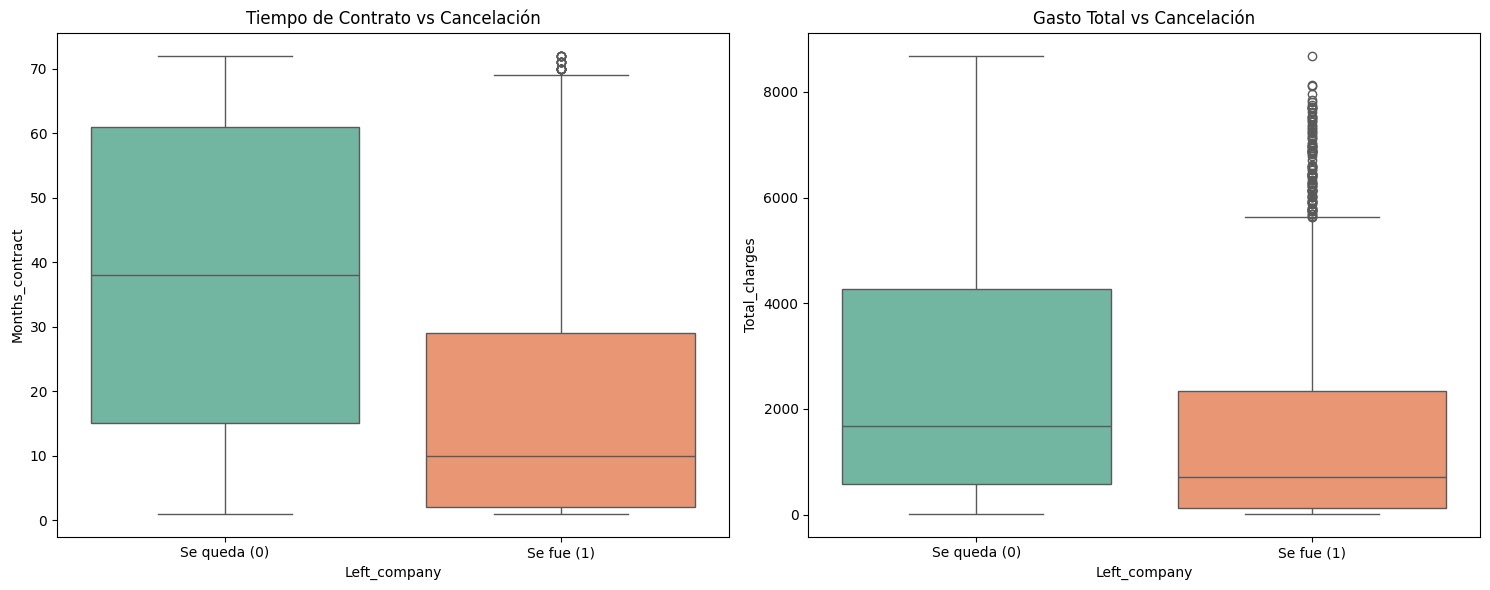

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(ax=axes[0], x='Left_company', y='Months_contract', data=df_data, palette='Set2')
axes[0].set_title('Tiempo de Contrato vs Cancelación')
axes[0].set_xticklabels(['Se queda (0)', 'Se fue (1)'])

sns.boxplot(ax=axes[1], x='Left_company', y='Total_charges', data=df_data, palette='Set2')
axes[1].set_title('Gasto Total vs Cancelación')
axes[1].set_xticklabels(['Se queda (0)', 'Se fue (1)'])

plt.tight_layout()
plt.show()

### Modelado Predictivo

#### Separación de Datos

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total de registros: {len(df_procesado)}")
print(f"Registros para entrenamiento (80%): {X_train.shape[0]}")
print(f"Registros para prueba (20%): {X_test.shape[0]}")

Total de registros: 7032
Registros para entrenamiento (80%): 5625
Registros para prueba (20%): 1407


#### Creación de Modelos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

- Un modelo puede requerir normalización, como Regresión Logística o KNN.
- El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:
- Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.
- Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [ ]:
# Modelo 1: Regresión Logística (Requiere Normalización)
# Se entrenó utilizando datos normalizados (StandardScaler). 
# Esto es vital porque el modelo calcula coeficientes para cada variable. 
# Si una variable tiene un rango de 0 a 5000 y otra de 0 a 1, el modelo se sesgaría dándole muchísima más 
# importancia a la de mayor magnitud. La normalización asegura que todas las variables compitan en igualdad 
# de condiciones (media 0 y varianza 1)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
print("Modelo entrenado.")

Modelo entrenado.


In [ ]:
# Modelo 2: Random Forest (No requiere Normalización)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Modelo entrenado.")

Modelo entrenado.


#### Evaluación de los Modelos

Evalúa cada modelo utilizando las siguientes métricas:
- Exactitud (Acurácia)
- Precisión
- Recall
- F1-score
- Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:
- ¿Cuál modelo tuvo el mejor desempeño?
- ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:
- - Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.
- - Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

--- Métricas: Regresión Logística ---
Exactitud: 0.7967
Precisión: 0.6384
Recall:    0.5428
F1-Score:  0.5867
------------------------------
--- Métricas: Random Forest ---
Exactitud: 0.7768
Precisión: 0.5993
Recall:    0.4840
F1-Score:  0.5355
------------------------------


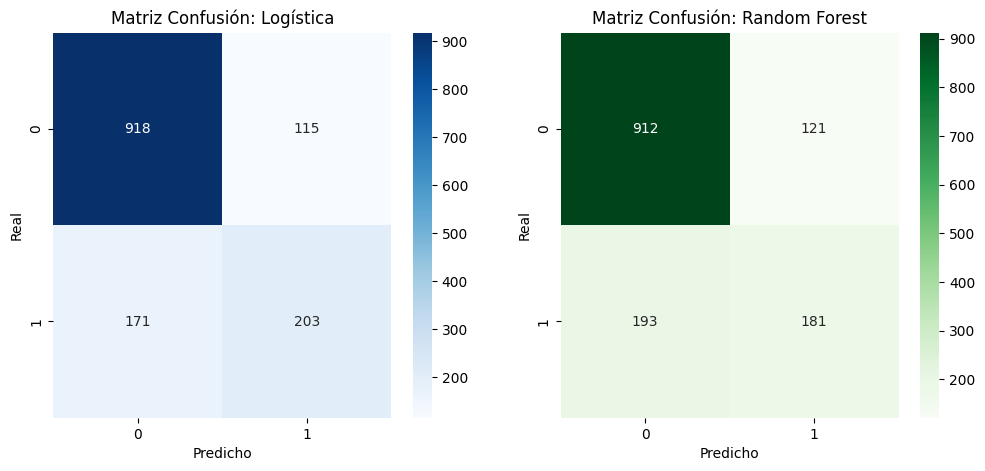

In [57]:
def evaluar_modelo(nombre, y_real, y_pred):
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred)
    recall = recall_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred)
    
    print(f"--- Métricas: {nombre} ---")
    print(f"Exactitud: {accuracy:.4f}")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print("-" * 30)
    return [accuracy, precision, recall, f1]


res_log = evaluar_modelo("Regresión Logística", y_test, y_pred_log)
res_rf = evaluar_modelo("Random Forest", y_test, y_pred_rf)


fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Matriz Confusión: Logística')
ax[0].set_xlabel('Predicho')
ax[0].set_ylabel('Real')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title('Matriz Confusión: Random Forest')
ax[1].set_xlabel('Predicho')
ax[1].set_ylabel('Real')

plt.show()

La Regresión Logística es el mejor modelo en este caso. No solo es más exacto, sino que es mejor detectando a los clientes que se van y se equivoca menos al predecir.

In [58]:
print(f"Logística - Entrenamiento: {log_model.score(X_train_scaled, y_train):.4f} | Prueba: {log_model.score(X_test_scaled, y_test):.4f}")
print(f"Random Forest - Entrenamiento: {rf_model.score(X_train, y_train):.4f} | Prueba: {rf_model.score(X_test, y_test):.4f}")

Logística - Entrenamiento: 0.8071 | Prueba: 0.7967
Random Forest - Entrenamiento: 0.9972 | Prueba: 0.7768


Random Forest tiene OVERFITTING.
En entrenamiento tiene un 0.9972
En prueba cae a 0.7768.
El modelo se volvió demasiado complejo. Al ser un bosque de árboles sin límites, memorizó ruidos y casos específicos de la base de entrenamiento en lugar de aprender patrones generales. Para arreglarlo, habría que limitar la profundidad de los árboles.

### Interpretación y Conclusiones

#### Análisis de la Importancia de las Variables

C:\Users\paula\AppData\Local\Temp\ipykernel_1680\1600429858.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_log.head(10), x='Impacto', y='Variable', palette='Reds_r')
C:\Users\paula\AppData\Local\Temp\ipykernel_1680\1600429858.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_rf.head(10), x='Importancia', y='Variable', palette='Greens_r')


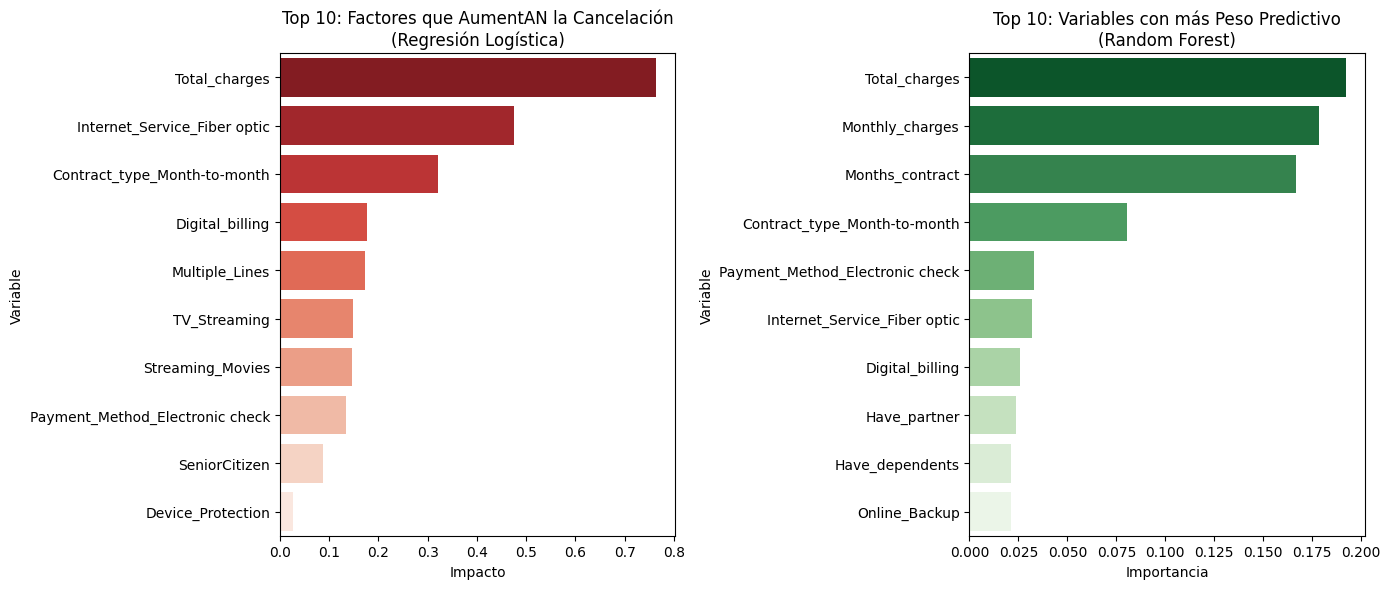

--- Variables que más ayudan a RETENER (Coeficientes más negativos) ---
                  Variable   Impacto
6          Online_Security -0.148639
20  Contract_type_Two year -0.340323
13         Monthly_charges -0.406017
15      Internet_Service_0 -0.507093
3          Months_contract -1.504196


In [59]:
importancia_log = pd.DataFrame({
    'Variable': X.columns,
    'Impacto': log_model.coef_[0]
}).sort_values(by='Impacto', ascending=False)


importancia_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=importancia_log.head(10), x='Impacto', y='Variable', palette='Reds_r')
plt.title('Top 10: Factores que AumentAN la Cancelación\n(Regresión Logística)')

plt.subplot(1, 2, 2)
sns.barplot(data=importancia_rf.head(10), x='Importancia', y='Variable', palette='Greens_r')
plt.title('Top 10: Variables con más Peso Predictivo\n(Random Forest)')

plt.tight_layout()
plt.show()

print("--- Variables que más ayudan a RETENER (Coeficientes más negativos) ---")
print(importancia_log.tail(5))

Tras evaluar los modelos, se selecciona la Regresión Logística. Aunque el Random Forest es potente, presentó un overfitting severo. La Regresión Logística mostró un equilibrio perfecto entre entrenamiento y prueba, siendo más confiable para predecir nuevos casos.

#### Conclusión

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.

#### Informe de Análisis: Predicción de Cancelación de Clientes
1. Introducción

    En este proyecto, se desarrolló un modelo capaz de identificar qué clientes tienen más probabilidad de cancelar sus servicios. Para lograrlo, se limpieron los datos, se transformaron las variables de texto en números y se compararon dos modelos de clasificación uno de regresión logística y otro random forest.

2. Rendimiento de los Modelos
    Después de entrenar y probar ambos modelos con una división de 80% para entrenamiento y 20% para prueba, estos fueron los resultados:
    - Regresión Logística: Fue el modelo ganador. Logró una exactitud del 79.6% y, lo más importante, mostró un rendimiento muy estable entre los datos de entrenamiento y los de prueba. Esto significa que el modelo aprendió patrones generales y no solo memorizó los datos.
    - Random Forest: Aunque es un modelo muy potente, presentó Overfitting. En el entrenamiento tuvo un acierto casi perfecto (99%), pero al probarlo con datos nuevos bajó a 77%. Esto indica que se volvió demasiado complejo y no sería tan confiable en el mundo real como la Regresión Logística.

3. Factores que influyen en la cancelación
    Gracias al análisis de los coeficientes del modelo, se identificó qué es lo que realmente motiva a un cliente a irse o a quedarse:
    - Factores de Riesgo
        - Cargos Totales Elevados: Los clientes que han acumulado facturas altas tienen mayor tendencia a cancelar.
        - Tipo de Contrato mes a mes: Al no tener un compromiso a largo plazo, estos clientes se van con mucha facilidad ante cualquier oferta de la competencia.
        - Servicio de Fibra Óptica: Curiosamente, los clientes con fibra óptica cancelan más que otros. Esto podría indicar que el servicio es muy caro o que está presentando fallas técnicas.
        - Métodos de Pago Electrónicos: Los clientes con Electronic Check muestran una tasa de cancelación más alta que los que usan métodos tradicionales.
    - Factores de Retención
        - Antigüedad: Es el factor más importante. Cuanto más tiempo lleva un cliente en la empresa, es mucho menos probable que se vaya.
        - Contratos a Largo Plazo: Los contratos de 1 o 2 años son la mejor herramienta para retener clientes.
        - Servicios Adicionales: Los clientes que contratan seguridad online o protección de dispositivos tienden a ser más leales.

4. Estrategias de Retención Propuestas
    Basándome en los datos, se proponen las siguientes estrategias para la empresa:
    - Como la antigüedad es clave, se propone crear promociones especiales para los clientes que están en sus primeros 6 meses. Si pasan del primer año, la probabilidad de que se queden para siempre aumenta drásticamente.
    - Ofrecer un descuento en la factura mensual a aquellos clientes que acepten cambiar su contrato por uno anual. El costo del descuento es mucho menor que el costo de perder al cliente.
    - Es necesario hacer una encuesta de satisfacción específica para los usuarios de fibra óptica. Si el modelo dice que se están yendo, hay algo en ese producto que no está funcionando bien.
    - Promover los servicios de Online Security no solo genera más ingresos, sino que funciona como un ancla que hace que el cliente valore más su permanencia.